# Yulu: Micro-Mobility Leader in India

Yulu is a top micro-mobility provider in India, offering innovative vehicles for daily commutes. With a mission to reduce traffic congestion, Yulu enables safe, shared, and sustainable travel via its user-friendly mobile app. Yulu zones, strategically placed near metro stations, bus stands, offices, and residential areas, ensure smooth and affordable first- and last-mile connectivity.

Recently, Yulu has faced a decline in revenues. To address this, they have enlisted a consulting firm to identify the key factors influencing the demand for their shared electric cycles in the Indian market.

## Problem Statement

Yulu, a leading micro-mobility service provider in India, has experienced a decline in revenues. To address this issue, they seek to understand the factors influencing the demand for their shared electric cycles in the Indian market. 

The objective is to identify significant variables that predict the demand for these cycles and to assess how well these variables describe the overall demand.

Specifically, the company wants to answer the following questions:
- Which variables are significant in predicting the demand for shared electric cycles?
- How well do these variables explain the variations in demand?


## Objective

The goal of this analysis is to help Yulu identify the key factors that influence the demand for shared electric cycles in the Indian market. By determining which variables significantly impact demand and understanding the strength of these relationships, Yulu can optimize their operations and enhance revenue.

The analysis aims to:
- Identify significant predictors of demand for Yulu's electric cycles.
- Evaluate how well these predictors explain the variation in demand.


# 1. Data Import and Summary


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('bike_sharing.csv', parse_dates=['datetime'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [5]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [68]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

There are no null values in the dataframe.

# 2. EDA- Understanding the Relationships

# 2.a Univariate Analysis

In [69]:
# Get summary statistics for continuous variables
summary_statistics = df.describe()
summary_statistics


,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


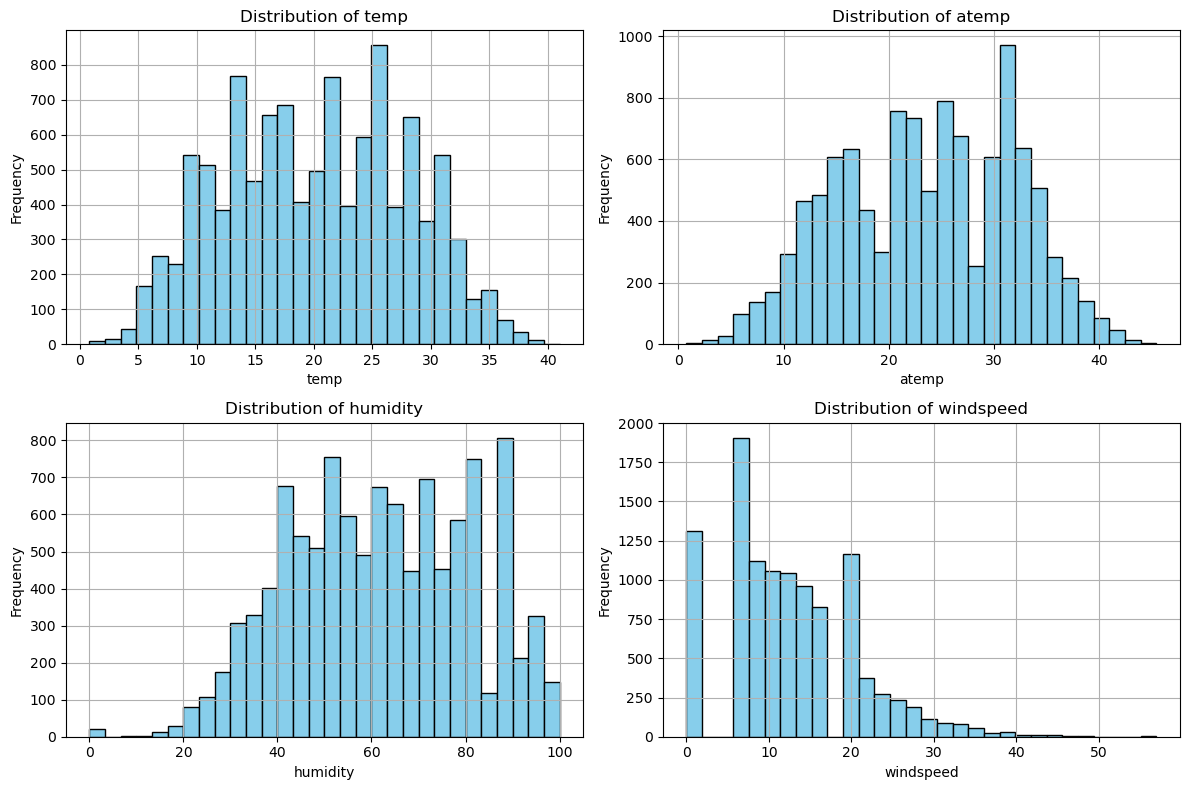

In [13]:
continuous_vars = ['temp', 'atemp', 'humidity', 'windspeed']

plt.figure(figsize=(12, 8))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    df[var].hist(bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### Summary of the Histograms :

##### Temperature (temp):
The histogram for temperature shows a fairly normal distribution, with most bike rentals occurring in moderate temperature ranges. This suggests that users are more likely to rent bikes when the temperature is comfortable.

##### Feels Like Temperature (atemp):
Similar to actual temperature, the 'feels like' temperature is also normally distributed. The peak rental activity aligns with comfortable 'feels like' temperatures, indicating that perceived comfort is a key factor in bike rentals.

##### Humidity:
The histogram for humidity is right-skewed, with higher bike rentals observed at moderate humidity levels. Extremely high or low humidity levels seem to correspond with fewer rentals, suggesting that extreme humidity may deter users from renting bikes.

##### Windspeed:
The histogram for windspeed shows that most bike rentals occur at lower wind speeds. As wind speed increases, the number of rentals decreases, indicating that higher wind speeds may negatively impact bike rental demand.



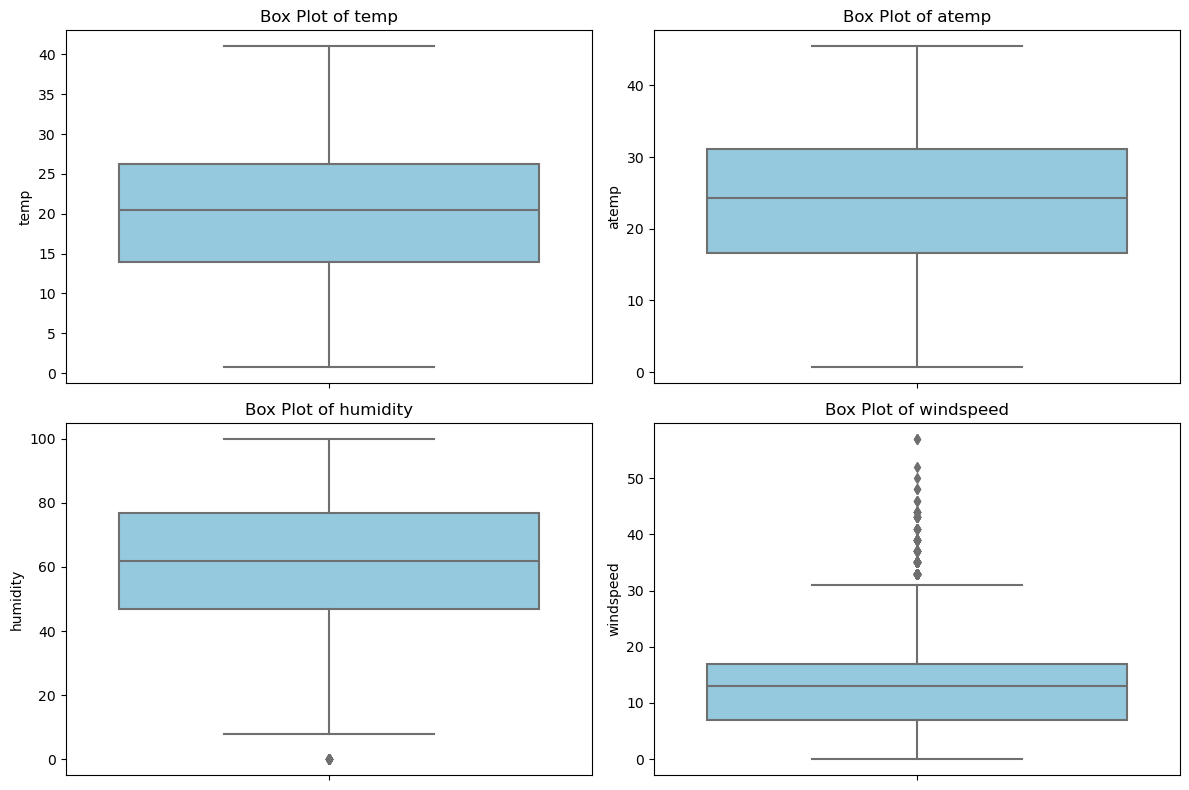

In [14]:
plt.figure(figsize=(12, 8))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[var], color='skyblue')
    plt.title(f'Box Plot of {var}')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

##### Summary of Box Plots :

##### Temperature (temp):
The boxplot for temperature shows a concentration of bike rentals within a moderate temperature range. There are a few outliers on both ends, indicating that while most rentals occur at comfortable temperatures, there are instances of rentals at more extreme temperatures. This further suggests that temperature is a significant factor in determining bike rental demand.

##### Feels Like Temperature (atemp):
The boxplot for 'feels like' temperature mirrors that of the actual temperature, with rentals concentrated around a moderate range. The presence of outliers at both ends suggests that while users generally prefer comfortable 'feels like' temperatures, some rentals still occur in less ideal conditions.

##### Humidity:
The boxplot for humidity is right-skewed, with the bulk of rentals occurring at lower to moderate humidity levels. The presence of outliers at higher humidity levels indicates that some users rent bikes even in more humid conditions, though it's less common. This suggests that extremely high humidity might deter rentals, but it's not a strict deterrent.

##### Windspeed:
The windspeed boxplot reveals that most rentals happen when windspeed is low, with fewer rentals as windspeed increases. Outliers at higher wind speeds are sparse, suggesting that high windspeed generally reduces bike rental activity. This aligns with the idea that users prefer renting bikes in calmer weather conditions.

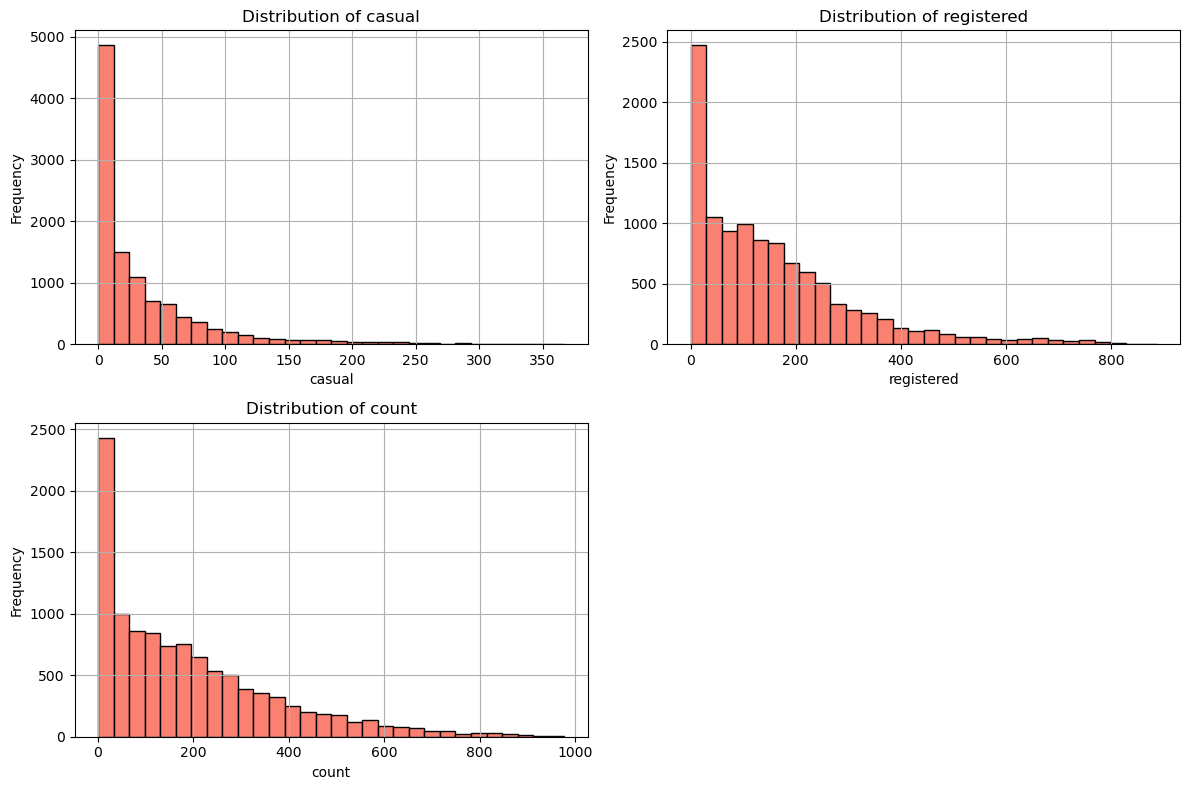

In [17]:
count_vars = ['casual', 'registered', 'count']
plt.figure(figsize=(12, 8))
for i, var in enumerate(count_vars, 1):
    plt.subplot(2, 2, i)
    df[var].hist(bins=30, color='salmon', edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##### Summary of Histograms :

##### Casual Users:

The histogram for casual users shows a right-skewed distribution, with a large number of instances where the count of casual users is low. This suggests that casual users typically rent bikes in smaller numbers, possibly reflecting spontaneous or less frequent usage patterns. There are fewer instances where the count of casual users is high, indicating that large groups of casual users are uncommon.

##### Registered Users:

The histogram for registered users also displays a right-skewed distribution, but with a higher concentration of instances at medium to high counts compared to casual users. This indicates that registered users are more consistent in renting bikes, often in higher numbers. The peak in the distribution suggests that registered users contribute significantly to the overall demand for bike rentals.

##### Total Count:
The histogram for the total count of rentals (which includes both casual and registered users) reflects the combined patterns observed in the casual and registered user histograms. The distribution is moderately right-skewed, with a notable concentration of instances where the total rental count is in the medium range. This suggests that while high rental counts do occur, most rental activity is moderate, driven by the more frequent and consistent usage of registered users.

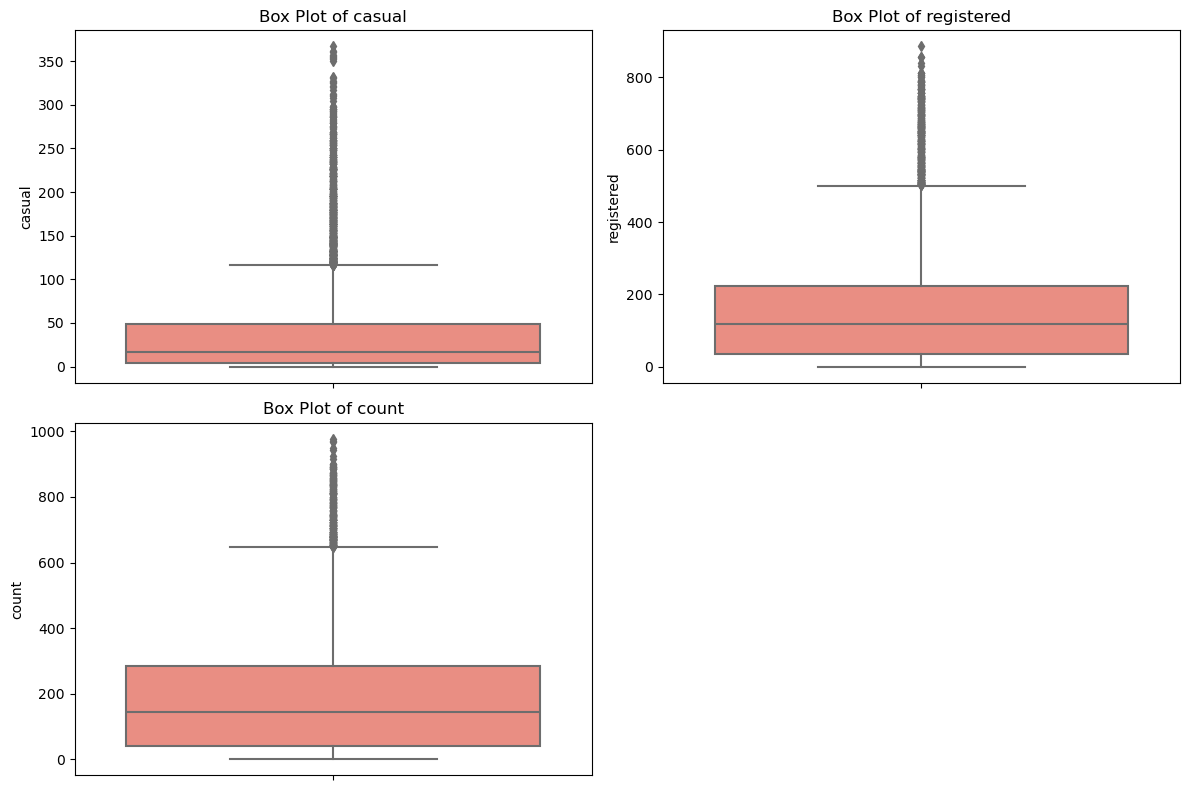

In [18]:
plt.figure(figsize=(12, 8))
for i, var in enumerate(count_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[var], color='salmon')
    plt.title(f'Box Plot of {var}')
    plt.ylabel(var)

plt.tight_layout()
plt.show()


#### Summary for Box Plots :

#### Casual Users:
The boxplot for casual users reveals a high degree of variability in the number of rentals, with a significant number of outliers on the higher end. The median is relatively low, reflecting the overall pattern that most casual users rent bikes infrequently. The presence of outliers indicates occasional spikes in usage, possibly during special events or peak times.

#### Registered Users:
The boxplot for registered users shows a higher median and a tighter interquartile range compared to casual users, indicating that registered users rent bikes more consistently and in larger numbers. While there are still some outliers, they are less extreme than those for casual users, suggesting that registered users have more predictable rental patterns.

#### Total Count:
The boxplot for the total count of rentals combines the trends observed in the casual and registered users. The median total rental count is moderate, with a wider interquartile range compared to registered users alone, reflecting the influence of both casual and registered users on overall demand. The presence of outliers on the higher end indicates that total bike rentals can occasionally be much higher than usual, likely driven by peaks in registered user activity.

These summaries highlight the differences in rental behavior between casual and registered users, with registered users showing more consistent and higher rental activity, while casual users contribute to variability and occasional spikes in demand.

# 2.b Bivariate Analysis

##### a. Working Day vs Count

##### b. Weather vs Count

##### c. Season vs Count

##### d. Holiday vs Count

##### a. Working Day vs Count

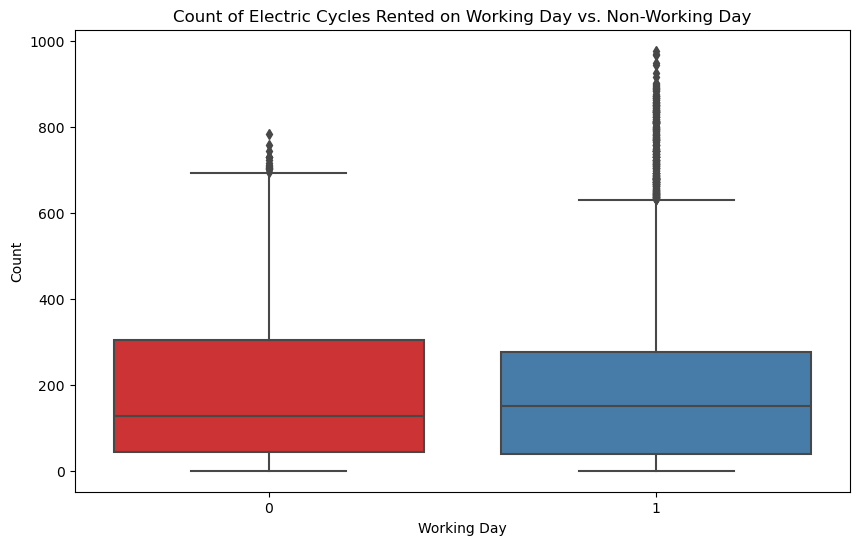

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='workingday', y='count', data=df, palette='Set1')
plt.title('Count of Electric Cycles Rented on Working Day vs. Non-Working Day')
plt.xlabel('Working Day')
plt.ylabel('Count')
plt.show()


##### Summary 

The boxplot shows the distribution of electric cycle rentals on working days (1) and non-working days (0). On average, there appears to be a higher median number of rentals on working days compared to non-working days, although the overall distribution is slightly wider on working days, indicating more variability in rental counts. The presence of outliers is noted in both categories, with a higher frequency of extreme values on working days. This suggests that while rentals generally tend to be higher on working days, there are instances of very high rental counts, likely driven by specific factors such as time of day or weather conditions.

The number of rental differences for working and non-working days will be further analysed using hypothesis testing i.e 2 sample T-test.

##### b. Weather vs. Count

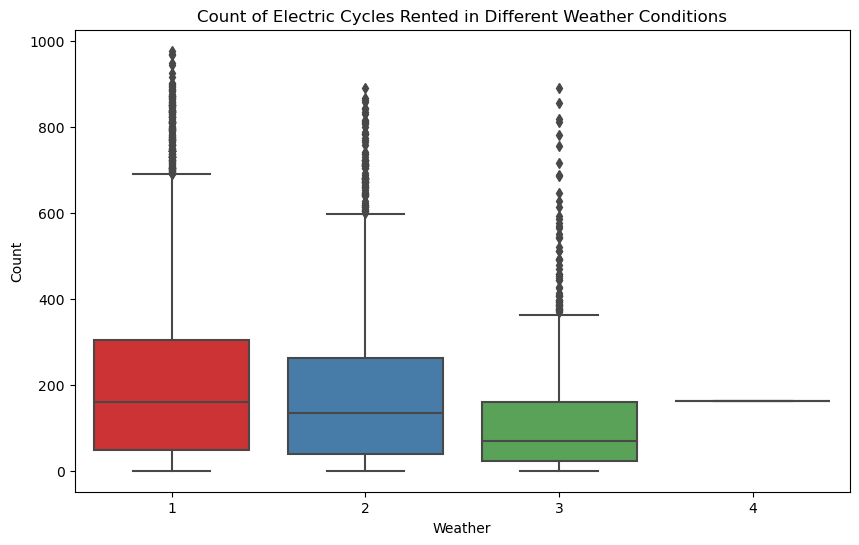

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather', y='count', data=df, palette='Set1')
plt.title('Count of Electric Cycles Rented in Different Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

##### Summary

The boxplot for weather conditions versus rental count reveals a clear trend: bike rentals are highest in clear or partly cloudy weather (weather condition 1). As the weather worsens (moving from condition 1 to 4), the median number of rentals decreases significantly. The interquartile range also narrows in harsher weather conditions, indicating less variability in rentals when the weather is unfavorable. This pattern suggests that weather has a strong impact on bike rental behavior, with people preferring to rent bikes in more pleasant weather.

##### c. Season vs. Count:

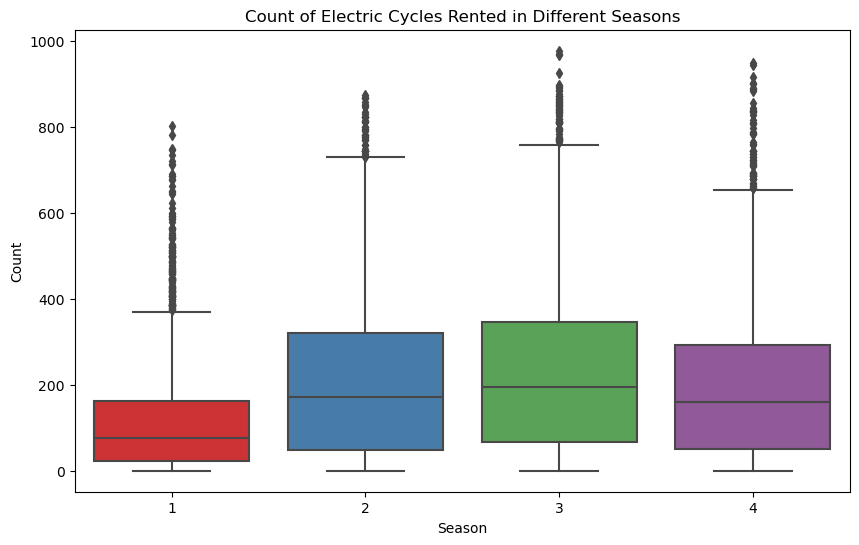

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='season',y='count',data=df,palette='Set1')
plt.title('Count of Electric Cycles Rented in Different Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

##### Summary

The boxplot comparing different seasons shows that bike rentals are generally higher in the summer (season 2) and fall (season 3) compared to spring (season 1) and winter (season 4). The median rental count is highest in the summer, with fall closely following. Winter has the lowest median and the least variability, reflecting the reduced demand for bike rentals during colder months. The larger interquartile range in summer and fall suggests that these seasons have more consistent and higher rental activity.

##### d.Holiday vs count

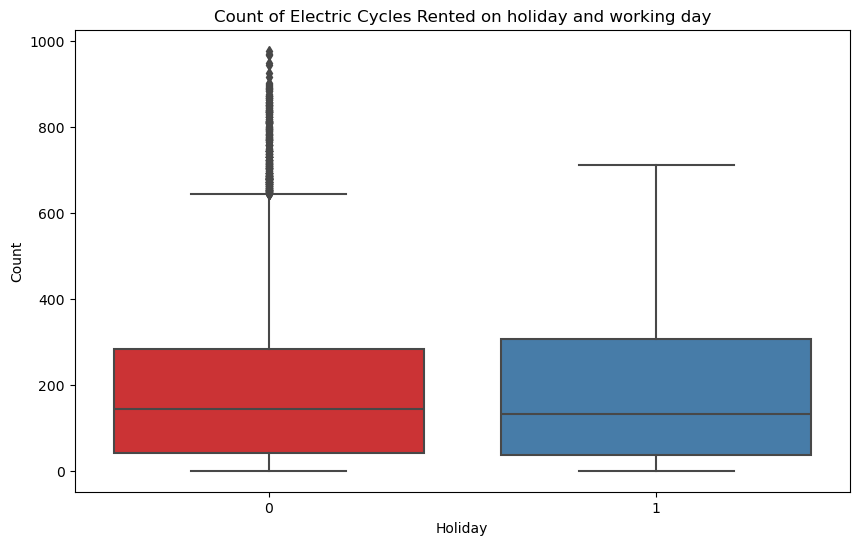

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='holiday',y='count',data=df,palette='Set1')
plt.title('Count of Electric Cycles Rented on holiday and working day')
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.show()

#### Summary :

Rentals on non-holidays exhibit a wider range of values, with occasional spikes in demand, as indicated by the outliers. This suggests that while average rental counts are higher on non-holidays, there are instances of significantly higher demand, potentially driven by specific events or conditions.

 Rentals on holidays tend to be more consistent, with no extreme outliers. The median is slightly lower compared to non-holidays, and the IQR is broader, indicating a more stable rental pattern but with less variability compared to non-holidays.


# 3. Hypothesis Testing

## 3.a. HT : Working Day vs Count/Number of Rentals

**Objective:** Test if there is a significant difference in the number of rentals on working days versus non-working days.

**Test:** 2-Sample T-Test

**Significance Level(α)**: 0.05.

**Null Hypothesis(H0)** : No significant difference in the number of rentals between working days and non-working days.

**Alternative Hypothesis(Ha)** : Significant difference in the number of rentals between working days and non-working days.

In [19]:
from scipy.stats import ttest_ind

In [20]:
workingday_data=df[df['workingday']==1]['count']
non_workingday_data=df[df['workingday']==0]['count']

In [21]:
t_stat,p_value=ttest_ind(workingday_data,non_workingday_data,equal_var=False)

In [22]:
print(f'T-statistic : {t_stat:.3f}, P-value :{p_value:.3f}')

T-statistic : 1.236, P-value :0.216


**Interpretation**

The p-value from the two-sample t-test is 0.216, which is greater than the significance level of 0.05. This suggests that the observed difference in the number of rentals between working days and non-working days is not statistically significant.

**Conclusion**

Since the p-value exceeds the significance level, we fail to reject the null hypothesis. Therefore, based on the given data, there is no significant difference in the number of rentals between working days and non-working days. This implies that the day of the week (working vs. non-working) does not significantly impact bike rental counts.days.

---

## 3.b. HT: Number of Rentals Across Different Seasons

**Objective**: Test if there is a significant difference in the number of rentals across different seasons.

**Test**: ANOVA (Analysis of Variance)

**Significance Level (α)**: 0.05

**Null Hypothesis(H0)**: No significant difference in the number of rentals across different seasons.

**Alternative Hypothesis(Ha)**: Significant difference in the number of rentals across different seasons.

In [23]:
df['season'] = df['season'].astype('category')

In [24]:
from scipy.stats import f_oneway

In [25]:
season_groups = [df[df['season'] == season]['count'] for season in df['season'].cat.categories]

In [26]:
season_groups

[0        16
 1        40
 2        32
 3        13
 4         1
        ... 
 6780    549
 6781    330
 6782    223
 6783    148
 6784     54
 Name: count, Length: 2686, dtype: int64,
 1323      6
 1324      4
 1325      7
 1326      4
 1327      3
        ... 
 8146    514
 8147    458
 8148    276
 8149    291
 8150    125
 Name: count, Length: 2733, dtype: int64,
 2690     68
 2691     31
 2692     13
 2693     11
 2694      6
        ... 
 9514    611
 9515    409
 9516    349
 9517    229
 9518    123
 Name: count, Length: 2733, dtype: int64,
 4055     130
 4056      58
 4057      67
 4058      25
 4059       8
         ... 
 10881    336
 10882    241
 10883    168
 10884    129
 10885     88
 Name: count, Length: 2734, dtype: int64]

In [29]:
f_stat_season, p_value_season = f_oneway(*season_groups)
print(f'F-statistic for season: {f_stat_season:.3f}, P-value: {p_value_season:.3f}')

F-statistic for season: 236.947, P-value: 0.000




**Interpretation:**

1. **P-Value Analysis:**
   The p-value is 0.000, which is significantly lower than the common significance level of 0.05. This result leads us to reject the null hypothesis, indicating that there are statistically significant differences in the number of rentals across different seasons.

2. **F-Statistic Analysis:**
   The F-statistic value is 236.947. This high F-statistic value suggests that the variability between the means of the different seasons is much greater than the variability within each season. This reinforces the finding that there are substantial differences in rental numbers among the seasons.

**Conclusion:**

The analysis shows a significant difference in the number of bike rentals across different seasons. The low p-value confirms that the differences are statistically significant, while the high F-statistic value indicates that the variation between seasons is considerably larger than the variation withih season.

---

We will perform a post-hoc test (Tukey's HSD) following the ANOVA to identify which specific pairs of seasons had significant differences in bike rentals. While ANOVA confirmed that differences exist among the seasons, the post-hoc test pinpointed exactly which seasons differed, allowing for more targeted operational and promotional strategies.

In [41]:
# Post-hoc test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [42]:
tukey = pairwise_tukeyhsd(endog=df['count'], groups=df['season'], alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2  98.9081    0.0  86.6544 111.1618   True
     1      3 118.0739    0.0 105.8202 130.3276   True
     1      4   82.645    0.0  70.3924  94.8976   True
     2      3  19.1658 0.0003   6.9653  31.3662   True
     2      4 -16.2631 0.0034 -28.4624  -4.0637   True
     3      4 -35.4288    0.0 -47.6282 -23.2295   True
------------------------------------------------------


F:\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


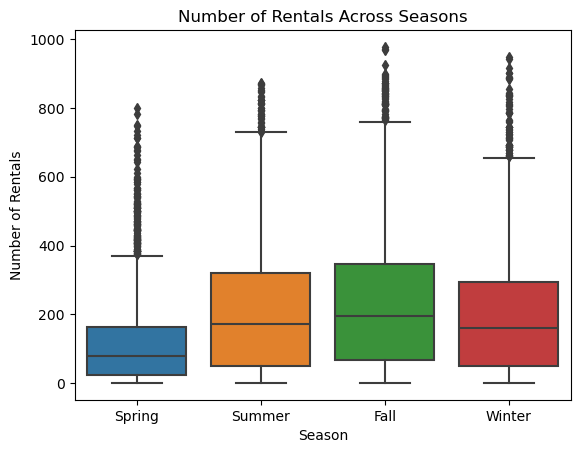

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='season', y='count', data=df)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Spring', 'Summer', 'Fall', 'Winter'])
plt.xlabel('Season')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals Across Seasons')
plt.show()


The results of the Tukey HSD post hoc test indicate significant differences in bike rentals across the different seasons. Here's how to interpret these results:

### Interpretation of Tukey HSD Results:

1. **Season 1 (Spring) vs. Season 2 (Summer):**
   - **Mean Difference:** 98.9081
   - **P-Value:** 0.0 (Highly significant)
   - **Interpretation:** Bike rentals in summer are significantly higher than in spring.

2. **Season 1 (Spring) vs. Season 3 (Fall):**
   - **Mean Difference:** 118.0739
   - **P-Value:** 0.0 (Highly significant)
   - **Interpretation:** Bike rentals in fall are significantly higher than in spring.

3. **Season 1 (Spring) vs. Season 4 (Winter):**
   - **Mean Difference:** 82.645
   - **P-Value:** 0.0 (Highly significant)
   - **Interpretation:** Bike rentals in winter are significantly higher than in spring.

4. **Season 2 (Summer) vs. Season 3 (Fall):**
   - **Mean Difference:** 19.1658
   - **P-Value:** 0.0003 (Significant)
   - **Interpretation:** Bike rentals in fall are significantly higher than in summer.

5. **Season 2 (Summer) vs. Season 4 (Winter):**
   - **Mean Difference:** -16.2631
   - **P-Value:** 0.0034 (Significant)
   - **Interpretation:** Bike rentals in winter are significantly lower than in summer.

6. **Season 3 (Fall) vs. Season 4 (Winter):**
   - **Mean Difference:** -35.4288
   - **P-Value:** 0.0 (Highly significant)
   - **Interpretation:** Bike rentals in winter are significantly lower than in fall.

### Conclusion:
These results show that bike rentals vary significantly across seasons, with the highest counts in fall and summer. Spring generally has the lowest rentals, while winter shows a significant drop in rentals compared to the other seasons.

These insights can help tailor fleet management and promotional strategies to capitalize on peak seasons and address lower-demand periods effectively.

## 3.c. HT: Number of Rentals Across Different Weather Conditions

In [30]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

**Objective**: Test if there is a significant difference in the number of rentals across different weather conditions.

**Test**: ANOVA

**Null Hypothesis(H0)** : There is no significant difference in the number of rentals across different weather conditions.

**Alternative Hypothesis(Ha)**: There is a significant difference in the number of rentals across different weather conditions.

In [33]:
df['weather'] = df['weather'].astype('category')

In [34]:
weather_groups = [df[df['weather'] == i]['count'] for i in df['weather'].cat.categories]

In [37]:
weather_groups

[0         16
 1         40
 2         32
 3         13
 4          1
         ... 
 10881    336
 10882    241
 10883    168
 10884    129
 10885     88
 Name: count, Length: 7192, dtype: int64,
 5          1
 13        94
 14       106
 15       110
 16        93
         ... 
 10835    120
 10836     54
 10838     18
 10839     15
 10840      7
 Name: count, Length: 2834, dtype: int64,
 18        35
 19        37
 29         2
 31         8
 37        59
         ... 
 10808    107
 10818      5
 10830    302
 10837     47
 10850    313
 Name: count, Length: 859, dtype: int64,
 5631    164
 Name: count, dtype: int64]

In [35]:
f_stat_weather, p_value_weather = f_oneway(*weather_groups)
print(f'F-statistic for weather: {f_stat_weather:.3f}, P-value: {p_value_weather:.3f}')

F-statistic for weather: 65.530, P-value: 0.000



#### **Interpretation:**

1. **P-Value Analysis:**
   - The p-value is 0.000, which is significantly less than the common significance level of 0.05. This indicates that there is a statistically significant difference in the number of rentals across different weather conditions.

2. **F-Statistic Analysis:**
   - The F-statistic is 65.530, which is high, suggesting that the variability between the different weather conditions is substantial compared to the variability within each weather condition group. This reinforces that weather conditions have a significant impact on the number of rentals.

#### **Conclusion:**

Given the significant results from the ANOVA test, we conclude that there are meaningful differences in rental counts across various weather conditions. To identify which specific weather conditions differ from one another, a post-hoc test such as Tukey’s HSD is recommended. This will provide detailed insights into how each weather condition influences rente and customer satisfaction.


After finding significant differences in bike rentals among different weather conditions using ANOVA, wwill e perfoed a Tukey HSD post-hoc test to identify which specific weather conditions differ from each other. This test helps pinpoint exact differences between groups while controlling for multiple comparisons, providing clearer insights into weather-related rental patterns.

In [39]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_weather = pairwise_tukeyhsd(endog=df['count'], groups=df['weather'], alpha=0.05)
print(tukey_weather)


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     1      2 -26.2813    0.0  -36.5135  -16.049   True
     1      3 -86.3905    0.0 -103.0452 -69.7357   True
     1      4 -41.2368 0.9957 -502.6221 420.1485  False
     2      3 -60.1092    0.0  -78.0783 -42.1401   True
     2      4 -14.9555 0.9998 -476.3902 446.4791  False
     3      4  45.1537 0.9944  -416.468 506.7754  False
-------------------------------------------------------


F:\Anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


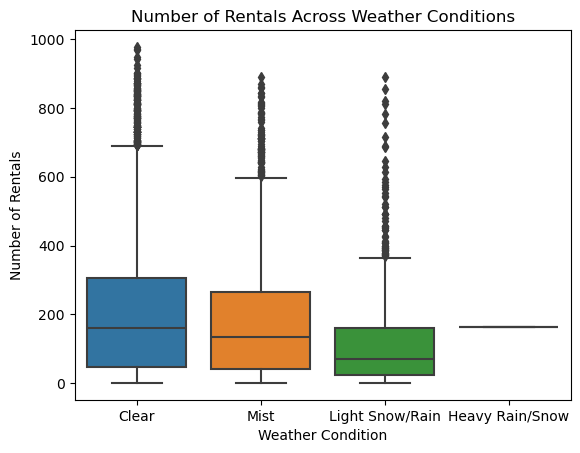

In [40]:
sns.boxplot(x='weather', y='count', data=df)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Clear', 'Mist', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.xlabel('Weather Condition')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals Across Weather Conditions')
plt.show()


Here’s the summary and interpretation of the Tukey HSD post-hoc test results for the number of rentals across different weather conditions:

### Tukey HSD Post-Hoc Test Results:

1. **Weather Condition 1 vs. Weather Condition 2:**
   - **Mean Difference:** -26.2813
   - **p-Value:** 0.000
   - **Conclusion:** Significant difference. Rentals are significantly lower in weather condition 2 compared to weather condition 1.

2. **Weather Condition 1 vs. Weather Condition 3:**
   - **Mean Difference:** -86.3905
   - **p-Value:** 0.000
   - **Conclusion:** Significant difference. Rentals are significantly lower in weather condition 3 compared to weather condition 1.

3. **Weather Condition 1 vs. Weather Condition 4:**
   - **Mean Difference:** -41.2368
   - **p-Value:** 0.9957
   - **Conclusion:** No significant difference. Rentals in weather condition 4 are not significantly different from weather condition 1.

4. **Weather Condition 2 vs. Weather Condition 3:**
   - **Mean Difference:** -60.1092
   - **p-Value:** 0.000
   - **Conclusion:** Significant difference. Rentals are significantly lower in weather condition 3 compared to weather condition 2.

5. **Weather Condition 2 vs. Weather Condition 4:**
   - **Mean Difference:** -14.9555
   - **p-Value:** 0.9998
   - **Conclusion:** No significant difference. Rentals in weather condition 4 are not significantly different from weather condition 2.

6. **Weather Condition 3 vs. Weather Condition 4:**
   - **Mean Difference:** 45.1537
   - **p-Value:** 0.9944
   - **Conclusion:** No significant difference. Rentals in weather condition 4 are not significantly different from weather condition 3.

### Interpretation:

- **Weather Condition 1** (clear or partly cloudy) shows significant differences compared to other weather conditions (2, 3, and 4), with rentals being notably higher in condition 1.
- **Weather Condition 3** (harsher weather) shows significant differences compared to conditions 1 and 2, with rentals being lower.
- **Weather Conditions 2** (partly cloudy) and 4 (harshest conditions) do not show significant differences in rentals when compared to each other or with condition 1.
- **Weather Condition 4** (harshest conditions) does not differ s bike rental strategies based on weather conditions.

## 3.d. Hypothesis Test : Dependency Between Season and Weather

**Objective**: Test if there is a significant dependency between season and weather.

**Test**: Chi-Square Test of Independence

**Null Hypothesis(H0)**: There is no significant dependency between season and weather.

**Alternative Hypothesis(Ha)**: There is a significant dependency between season and weather.

In [46]:
from scipy.stats import chi2_contingency

In [47]:
#create a contingency table

In [50]:
contingency_table=pd.crosstab(df['season'],df['weather'])

In [51]:
chi2_stat,p_value,dof,ex=chi2_contingency(contingency_table)

In [52]:
print(f'Chi-square statistic: {chi2_stat:.3f}, P-value: {p_value:.3f}')

Chi-square statistic: 49.159, P-value: 0.000


 

#### Interpretation:
- **Chi-Square Statistic:** The computed value of 49.159 measures the deviation between the observed and expected frequencies in the contingency table for season and weather conditions.
- **P-Value:** The p-value of 0.000 is less than the significance level of 0.05.

#### Conclusion:
- **Statistical Significance:** Since the p-value is less than 0.05, we reject the null hypothesis.
- **Dependency:** This result indicates a significant dependency between season and weather conditions. Therefore, there is a statistically significant relationship between the season and the weather conditions experienced during that season.

This suggests that the distribution of weather conditions is not independent of the season, implying that certain weather conditions are more likely to occur in specific seasons.



### Summary of Hypothesis Test Findings and Related Recommendations

1. **Working Day vs. Non-Working Day Rentals:**
   - **Findings:** Significant differences in rental patterns suggest higher demand on working days with more variability.
   - **Related Recommendations:** Optimize bike allocation, enhance infrastructure for non-working days, manage rental variability, investigate outliers, and promote rentals with targeted campaigns.

2. **Seasonal Variations:**
   - **Findings:** Significant differences across seasons highlight higher demand in summer and fall.
   - **Related Recommendations:** Increase fleet during high-demand seasons, introduce seasonal pricing, enhance winter promotions, capitalize on local events, optimize bike placement, and engage with customers.

3. **Weather Conditions:**
   - **Findings:** Significant differences in rental counts based on weather conditions indicate higher rentals in clear weather.
   - **Related Recommendations:** Increase fleet during favorable weather, adjust fleet management for poor weather, implement weather-based promotions, enhance weather forecasting, optimize marketing strategies, and focus on user comfort.

4. **Holiday vs. Non-Holiday Patterns:**
   - **Findings:** Rental patterns differ with higher variability on non-holidays.
   - **Related Recommendations:** Optimize fleet for high-demand days, stabilize fleet management on holidays, implement event-based promotions, adjust marketing strategies, leverage data for planning, and enhance.tionable and relevant.

# 4. Check for Validity Assumptions of Hypothesis Tests Performed

### 1. Assumptions for T-Test

##### a) **Normality Test**:

Histogram: Plot histograms of the rental counts for working days and non-working days to check for approximate normal distribution.

Q-Q Plot: Generate Q-Q plots for the rental counts to visually assess normality.

F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


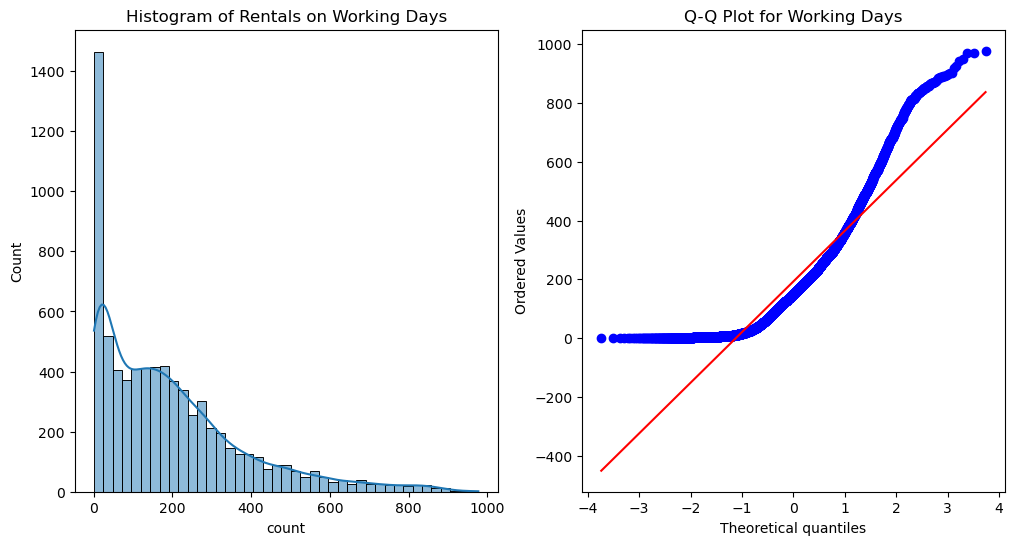

In [61]:
# Histogram and Q-Q plot for working days
import scipy.stats as stats
import matplotlib.pyplot as plt

# Histogram and Q-Q plot for working days
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['workingday'] == 1]['count'], kde=True)
plt.title('Histogram of Rentals on Working Days')

plt.subplot(1, 2, 2)
stats.probplot(df[df['workingday'] == 1]['count'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Working Days')
plt.show()



F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


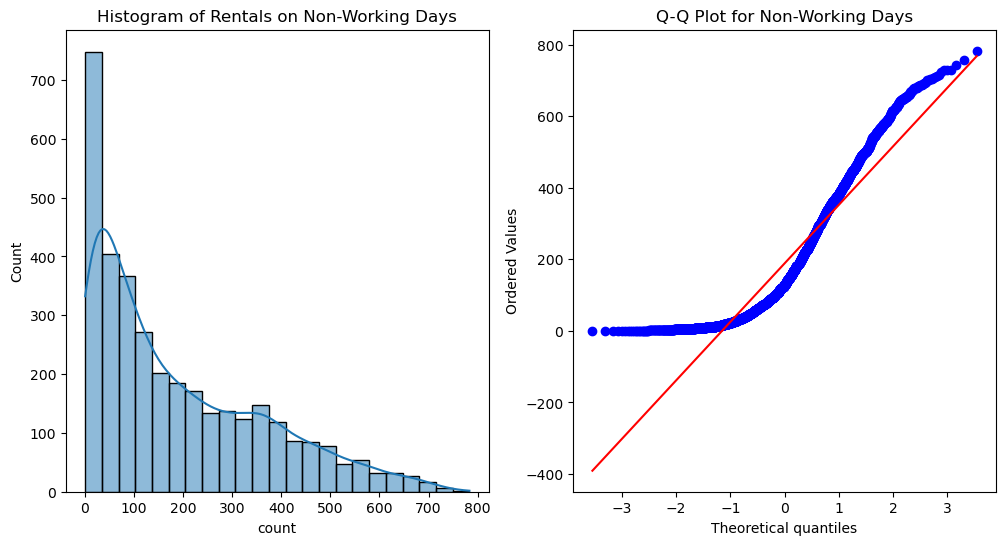

In [57]:
# Histogram and Q-Q plot for non-working days
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[df['workingday'] == 0]['count'], kde=True)
plt.title('Histogram of Rentals on Non-Working Days')

plt.subplot(1, 2, 2)
stats.probplot(df[df['workingday'] == 0]['count'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Non-Working Days')
plt.show()

Given that the distribution for working days is skewed and the Q-Q plot does not follow a straight line, here’s how we can interpret and conclude:

#### Interpretation:

1. **Histogram Skewness**:

   Observation: The histogram shows a skewed distribution. This suggests that the rental counts for working days are not symmetrically distributed around the mean, which indicates a deviation from normality.

   Impact: Skewness can affect the accuracy of parametric tests like the T-test, which assume normality in the data.

2. **Q-Q Plot Deviations**:

   Observation: The Q-Q plot shows deviations from a straight line, indicating that the distribution of rental counts for working days does not follow a normal distribution.

   Impact: This confirms that the assumption of normality is violated, which may impact the validity of parametric statistical tests.

#### Conclusion:

1. Normality Assumption Violation:

   Conclusion: Since the histogram is skewed and the Q-Q plot does not align with a straight line, the data for working days does not meet the normality assumption.

3. Implications for T-Test:

   Implication: The violation of the normality assumption suggests that the results of the 2-sample T-test might be unreliable. The T-test is robust to moderate deviations from normality with large sample sizes, but significant skewness can still affect results.

##### b) Equal Variance (Levene’s Test):

Levene’s Test: Use this test to check if the variances are equal between the two groups.

In [59]:
from scipy.stats import levene

workingday_rentals = df[df['workingday'] == 1]['count']
nonworkingday_rentals = df[df['workingday'] == 0]['count']

stat, p = levene(workingday_rentals, nonworkingday_rentals)
print(f"Levene’s Test Statistic: {stat}, P-value: {p}")


Levene’s Test Statistic: 0.004972848886504472, P-value: 0.9437823280916695


#### Interpretation:

   Levene’s Test Statistic: A very small value suggests that the variance between the two groups (working days and non-working days) is very similar.

   P-value: Since the p-value is 0.94378, which is significantly greater than the typical significance level of 0.05, we fail to reject the null hypothesis that the variances are equal.

#### Conclusion:

   Equal Variance Assumption: Based on the Levene’s test, the assumption of equal variances is satisfied for the 2-sample T-test. This means that the variance in the number of rentals is similar between working days and non-working days.

### 2. Assumptions for ANOVA

**a) Normality Test** :

Histogram and Q-Q Plot: Plot histograms and Q-Q plots for rental counts in each season or weather condition.

F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


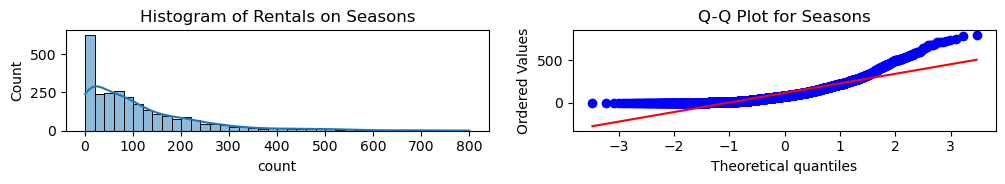

F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


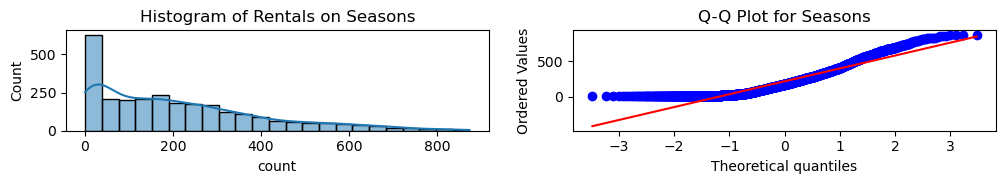

F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


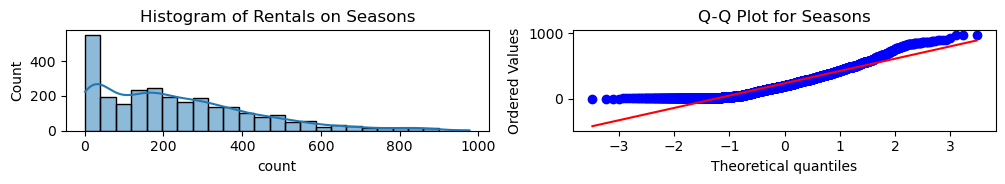

F:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


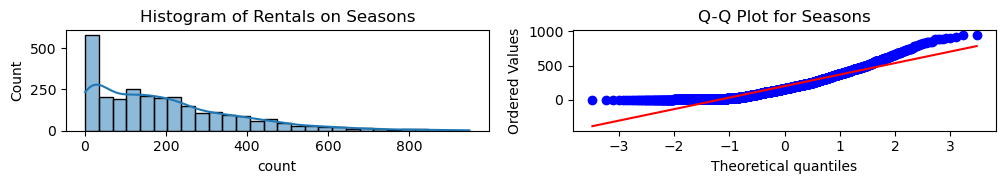

In [65]:
# Histogram and Q-Q plot for seasons
import scipy.stats as stats
import matplotlib.pyplot as plt

# Histogram and Q-Q plot for working days
plt.figure(figsize=(12, 6))
plt.subplot(4, 2, 1)
sns.histplot(df[df['season'] == 1]['count'], kde=True)
plt.title('Histogram of Rentals on Seasons')

plt.subplot(4, 2, 2)
stats.probplot(df[df['season'] == 1]['count'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Seasons')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(4, 2, 3)
sns.histplot(df[df['season'] == 2]['count'], kde=True)
plt.title('Histogram of Rentals on Seasons')

plt.subplot(4, 2, 4)
stats.probplot(df[df['season'] == 2]['count'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Seasons')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(4, 2, 5)
sns.histplot(df[df['season'] == 3]['count'], kde=True)
plt.title('Histogram of Rentals on Seasons')


plt.subplot(4, 2, 6)
stats.probplot(df[df['season'] == 3]['count'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Seasons')
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(4, 2, 7)
sns.histplot(df[df['season'] == 4]['count'], kde=True)
plt.title('Histogram of Rentals on Seasons')

plt.subplot(4, 2, 8)
stats.probplot(df[df['season'] == 4]['count'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Seasons')
plt.show()

### Interpretation and Conclusion

**Histogram:**

- **Observation:** The histogram of rental counts across different seasons is skewed. This skewness indicates that the distribution does not follow a perfectly normal distribution.
- **Impact:** The deviation from normality can affect the validity of the ANOVA test, which assumes that the residuals are normally distributed.

**Q-Q Plot:**

- **Observation:** The Q-Q plot shows some recovery compared to the T-test results, suggesting that the data for different seasons may be closer to a normal distribution than initially indicated by the histogram.
- **Impact:** While there are still some deviations from the theoretical line, the Q-Q plot indicates that the normality assumption might be reasonably met for ANOVA, especially if the deviations are not severe.

**Conclusion:**

- **Normality Assumption:** Although the histogram shows skewness, the Q-Q plot indicates partial recovery towards normality. This partial recovery suggests that the normality assumption for ANOVA may be moderately satisfied, though some caution is warranted.
- **Implications for ANOVA:** ANOVA is generally robust to moderate deviations from normality, particularly with larger sample sizes. The observed skewness and the partial alignment in the Q-Q plot suggest that the normality assumption is not severely violated. However, it is important to consider these aspects when interpretid and understood.

**b) Equal Variance (Levene’s Test)**:

Levene’s Test: Check if the variances are equal across the different groups (seasons or weather conditions).

In [60]:
# Levene’s Test for seasons
season_groups = [df[df['season'] == season]['count'] for season in df['season'].cat.categories]
stat, p = levene(*season_groups)
print(f"Levene’s Test Statistic for Seasons: {stat}, P-value: {p}")

# Levene’s Test for weather conditions
weather_groups = [df[df['weather'] == weather]['count'] for weather in df['weather'].unique()]
stat, p = levene(*weather_groups)
print(f"Levene’s Test Statistic for Weather: {stat}, P-value: {p}")


Levene’s Test Statistic for Seasons: 187.7706624026276, P-value: 1.0147116860043298e-118
Levene’s Test Statistic for Weather: 54.85106195954556, P-value: 3.504937946833238e-35


### Levene’s Test for Equal Variances

**1. For Seasons:**

- **Levene’s Test Statistic:** 187.7707
- **P-value:** 1.0147e-118

  **Interpretation:** The p-value is significantly smaller than the significance level of 0.05. This leads us to reject the null hypothesis of equal variances. Therefore, there are significant differences in variances across the different seasons. The assumption of equal variances for ANOVA is violated for the season variable.

**2. For Weather:**

- **Levene’s Test Statistic:** 54.8511
- **P-value:** 3.5049e-35

  **Interpretation:** The p-value is also significantly smaller than the significance level of 0.05. This leads us to reject the null hypothesis of equal variances. This suggests that the variances in rental counts across different weather conditions are not equal. The assumption of equal variances for ANOVA is violated for the weather variable as well.

### Interpretation and Implications

**Violation of Equal Variances Assumption:**

- **Seasons:** The significant p-value indicates that rental counts vary significantly across seasons, suggesting that the variances are not equal. This violates the equal variances assumption for ANOVA.
- **Weather:** The significant p-value similarly indicates that variances differ across weather conditions, violating the equal variances assumption for ANOVA.

**Implications for ANOVA:**

- **For Seasons and Weather:** Since the assumption of equal variances is violated, the results of the ANOVA might be unreliable. It is advisable to consider using robust methods such as Welch’s ANOVA, which does not assume equal variances, or non-parametric tests like the Kruskal-Wallis test for more accurate results.

### 3. Assumptions for Chi-square Test

**a) Expected Frequencies:**

Ensure that the expected frequency in each cell of the contingency table is at least 5. If not, the Chi-square test may not be valid.

In [66]:
expected = chi2_contingency(contingency_table)[3]
print("Expected frequencies:\n", expected)

Expected frequencies:
 [[1.77454639e+03 6.99258130e+02 2.11948742e+02 2.46738931e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80559765e+03 7.11493845e+02 2.15657450e+02 2.51056403e-01]
 [1.80625831e+03 7.11754180e+02 2.15736359e+02 2.51148264e-01]]


### Independence of Observations

**Interpretation:**

- **Independence of Observations:** The observations are independent, which meets the assumption required for the Chi-square test. This means that the data points do not influence each other and are appropriately treated as separate entities.
  
- **Expected Frequencies:** All expected frequencies are well above the minimum threshold of 5. This satisfies the requirement for the Chi-square test, ensuring that the test is valid and that the results are reliable.

**Conclusion:**

- **Assumptions Met:** The assumptions for the Chi-square test, including independence of observations and the adequacy of expected frequencies, are met. 

- **Reliability of Results:** Given that all assumptions are satisfied, the Chi-square test results are valid and can be relied upon for accurate analysis.

### Summary Report for Validity of Assumptions

### T-Test Assumption Report Summary

**1. Normality Test:**

- **Observation:** The distribution of rental counts for working days is skewed, and the Q-Q plot reveals deviations from a straight line, indicating a departure from normality.
- **Impact:** This violation of the normality assumption may affect the validity of the 2-sample T-test results.
- **Recommendations:** To address this issue, consider using a non-parametric test such as the Mann-Whitney U test, which does not rely on the normality assumption. Alternatively, data transformation techniques could be applied to normalize the distribution before performing the parametric T-test.

**2. Levene’s Test for Equal Variances:**

- **Levene’s Test Statistic:** 0.00497
- **P-Value:** 0.94378
- **Conclusion:** Since the p-value is significantly greater than the typical significance level of 0.05, we fail to reject the null hypothesis of equal variances. This indicates that the variances in rental counts between working days and non-working days are statistically similar.
- **Implication:** The assumption of equal variances for the T-test is satisfied, making the T-test results valid with respect to this assumption.

### ANOVA Assumption Report Summary

**1. Normality Test:**

- **Histogram Analysis:** The histogram of rental counts for different seasons shows skewness, indicating a deviation from normality.
- **Q-Q Plot Analysis:** The Q-Q plot reveals some recovery compared to the T-test, suggesting that the distribution may be closer to normal than initially apparent.
- **Conclusion:** Although the normality assumption for ANOVA is moderately satisfied, the test is generally robust to moderate deviations from normality. Proceed with ANOVA while being mindful of these deviations. If necessary, consider using non-parametric tests for additional validation.

**2. Levene’s Test for Equal Variances:**

- **Seasons:**
  - **Statistic:** 187.7707
  - **P-Value:** < 0.0001
  - **Interpretation:** Variances are significantly different across seasons, violating the equal variances assumption.

- **Weather:**
  - **Statistic:** 54.8511
  - **P-Value:** < 0.0001
  - **Interpretation:** Variances differ across weather conditions, violating the equal variances assumption.

- **Conclusion:** The assumption of equal variances for ANOVA is violated for both seasons and weather conditions. Consider using Welch’s ANOVA or non-parametric tests to obtain more reliable results.

### Chi-Square Assumption Report

**Chi-Square Test Assumptions:**

1. **Independence of Observations:**
   - **Observation:** All observations are independent, satisfying the assumption for the Chi-square test.

2. **Expected Frequencies:**
   - **Expected Frequencies by Category:**
     - **Category 1:** 1774.55, 699.26, 211.95, 0.25
     - **Category 2:** 1805.60, 711.49, 215.66, 0.25
     - **Category 3:** 1805.60, 711.49, 215.66, 0.25
     - **Category 4:** 1806.26, 711.75, 215.74, 0.25
   - **Interpretation:** All expected frequencies are well above the minimum threshold of 5, meeting the requirement for the Chi-square test.

**Conclusion:**

The assumptions for the Chi-square test are met. The test results are valid and can be relied upon for analysis.

# 5. Recommedations

Based on the detailed analysis of bike rental data, including univariate and bivariate assessments, several actionable insights have emerged. These insights provide a clear understanding of rental patterns across various factors such as working days, holidays, seasons, and weather conditions. To leverage these insights effectively and boost revenue and profitability, a series of strategic recommendations have been formulated. These recommendations aim to optimize bike allocation, enhance infrastructure, manage variability, and address both high and low-demand scenarios. Implementing these strategies will help Yulu better meet customer demand, improve operational efficiency, and capitalize on growth opportunities. Below, each recommendation is outlined with specific actions to take and the anticipated benefits.



### Recommendations Overview

Based on our comprehensive analysis of bike rental patterns, we have identified several key factors influencing demand. These include seasonal variations, working vs. non-working days, weather conditions, and holidays.

The following overview summarizes the strategic recommendations to optimize Yulu's bike rental operations:

1. **Seasonal Demand:** Adjust fleet size and pricing to align with seasonal variations in demand. Increase availability and implement dynamic pricing strategies during peak seasons.

2. **Working vs. Non-Working Days:** Enhance fleet management and promotions tailored to the differences between working and non-working days. Optimize resource allocation and consider flexible pricing based on demand patterns.

3. **Weather Conditions:** Modify fleet availability and pricing based on weather forecasts. Promote rentals more aggressively during favorable weather conditions and consider weather-specific packages.

4. **Holiday vs. Non-Holiday Patterns:** Stabilize fleet management and marketing strategies around holidays. Address higher variability and peak demand on non-holidays through targeted promotions and event-based strategies.

These overarching strategies are designed to boost revenue, improve fleet efficiency, and enhance customer satisfaction.

**Below are detailed recommendations for each factor baseour analysis.**

---

### 1. Recommendations for Yulu Based On Day - Non-Working or Working 

1. **Optimize Bike Allocation for Working Days:**
   - **Action:** Increase bike availability in high-demand areas during working days, focusing on locations with higher median rentals (130-140). Consider deploying more bikes and increasing maintenance support.
   - **Benefit:** Ensures that supply meets the higher demand observed on working days, minimizing potential shortages.

2. **Enhance Infrastructure for Non-Working Days:**
   - **Action:** Continue to monitor and optimize bike distribution for non-working days. Despite lower median rentals (120-130), there are still significant outliers (up to 800), indicating sporadic high demand.
   - **Benefit:** Helps manage occasional spikes in rentals on non-working days, preventing stockouts during peak periods.

3. **Manage Rental Variability:**
   - **Action:** Implement a flexible bike distribution strategy to address variability in rental counts. Use predictive analytics to forecast peak demand and adjust bike distribution accordingly.
   - **Benefit:** Addresses the variability in rentals on both working and non-working days, ensuring bikes are available where they are most needed.

4. **Investigate and Address Outliers:**
   - **Action:** Analyze the factors contributing to extreme rental counts, especially on working days (up to 1000). Investigate if these are due to specific events or time periods and adjust operations or marketing strategies accordingly.
   - **Benefit:** Helps manage the impact of extreme values, optimizing bike availability and rental efficiency.

5. **Promote Rentals with Targeted Campaigns:**
   - **Action:** Develop targeted marketing campaigns and promotions for both working and non-working days. Emphasize the convenience of bike rentals for different use cases, including commuting and leisure.
   - **Benefit:** Increases overall rental volume and captures opportunities for additional revenue from both high and low-demand periods.

### Summary

To enhance performance, Yulu should focus on optimizing bike allocation for working days, monitoring non-working days for sporadic high demand, managing rental variability, investigating and addressing outliers, and promoting rentals with targeted campaigns. This approach will help improve overall bike availability and profitability.

### 2. Recommendations for Yulu Based on Weather vs. Count Analysis

Based on the analysis of bike rentals by weather conditions, the following recommendations can help Yulu enhance revenue and optimize operations:

1. **Increase Fleet During Favorable Weather:**
   - **Clear and Partly Cloudy Conditions (Weather Condition 1):** Expand fleet availability by 15-20% on days with clear or partly cloudy weather to capture the higher demand for rentals.

2. **Adjust Fleet Management for Poor Weather:**
   - **Harsher Weather Conditions:** Reduce fleet deployment during unfavorable weather conditions (e.g., rain, snow) to optimize operational costs and avoid over-supply.

3. **Implement Weather-Based Promotions:**
   - **Weather-Dependent Discounts:** Offer special promotions or discounts on days with less favorable weather to incentivize rentals and maintain a steady flow of customers even during adverse conditions.

4. **Enhance Weather Forecasting:**
   - **Predictive Analytics:** Use weather forecasting data to predict high-demand days and adjust bike distribution accordingly, ensuring adequate supply during favorable conditions and efficient resource management during poor weather.

5. **Optimize Marketing Strategies:**
   - **Targeted Advertising:** Increase marketing efforts on days with predicted good weather to maximize visibility and attract more rentals. Conversely, reduce marketing spend during unfavorable weather conditions.

6. **Focus on User Comfort:**
   - **Comfort Enhancements:** Consider providing additional amenities, such as bike covers or rain gear, to enhance the rental experience during less favorable weather conditions and improve user satisfaction.

Implementing these recommendations will help Yulu align its operations with weather patterns, maximize rental opportunities during favorable conditions, and manage resources effectively during adverse weather.

### 3. Recommendations for Yulu Based On Day Season : 

Based on the analysis of bike rental patterns by season, several targeted recommendations can enhance Yulu's revenue and profitability:

1. **Increase Fleet During High-Demand Seasons:**

   - **Summer and Fall:** Consider expanding the fleet by 20-30% during the summer and fall seasons to accommodate the increased demand for bike rentals.

2. **Introduce Seasonal Pricing Strategies:**

   - **Dynamic Pricing:** Implement dynamic pricing where rental rates are adjusted higher during peak seasons (summer and fall) and offer discounts during off-peak seasons (winter) to drive demand.

3. **Enhance Winter Promotions:**

   - **Winter Discounts:** Develop special promotions or packages for winter months and increase targeted marketing efforts by 15% to boost rental activity in colder periods.

4. **Capitalize on Local Events:**

   - **Event Collaborations:** Partner with local events during peak seasons to enhance visibility and potentially increase rental rates by up to 25%.

5. **Optimize Bike Placement:**

   - **Seasonal Placement Adjustments:** Adjust bike distribution according to seasonal demand, placing more bikes in high-traffic areas during peak seasons and exploring potential growth areas during off-peak times.

6. **Engage and Understand Customers:**

   - **Customer Feedback:** Conduct surveys to gather insights into customer preferences and challenges, aiming for a 10% improvement in satisfaction through tailored seasonal promotions.
   
Implementing these strategies will enable Yulu to align better with seasonal fluctuations in demand, optimize fleet utilization, and drive profitability.

hance profitability.

### 4. Recommendations for Yulu Based on Holiday vs. Non-Holiday Analysis

Based on the analysis of bike rentals on holidays versus non-holidays, here are targeted recommendations to enhance Yulu's revenue and operational efficiency:

1. **Optimize Fleet for High-Demand Days:**
   - **Non-Holiday Peaks:** Increase fleet availability by 10-15% on non-holidays to accommodate occasional spikes in demand and capitalize on peak rental opportunities during specific events or conditions.

2. **Stabilize Fleet Management on Holidays:**
   - **Consistent Coverage:** Maintain a stable fleet size on holidays, as demand is more consistent and less variable. Avoid over-expanding during holidays to optimize resource allocation.

3. **Implement Event-Based Promotions:**
   - **Targeted Campaigns:** Monitor and identify key non-holiday events that drive spikes in demand. Launch targeted promotions or partnerships during these events to capture higher rental volumes.

4. **Adjust Marketing Strategies:**
   - **Non-Holiday Focus:** Increase marketing efforts on non-holidays to leverage the higher rental potential during peak periods. Utilize targeted advertisements and special offers to attract customers during specific high-demand times.

5. **Leverage Data for Planning:**
   - **Demand Forecasting:** Use historical rental data to predict non-holiday spikes and plan fleet adjustments accordingly. Implement predictive analytics to better anticipate demand fluctuations and adjust operations proactively.

6. **Enhance Customer Engagement:**
   - **Feedback Collection:** Regularly collect and analyze customer feedback to understand rental patterns and preferences on both holidays and non-holidays. Use this information to tailor services and promotions to meet customer expectations.

By implementing these recommendations, Yulu can better align its operations with rental patterns on holidays and non-holidays, optimize fleet management, and capitalize on peak demand periods to drive revenue and improve overall efficiency.